<a href="https://colab.research.google.com/github/nadireus/Machine-Learning/blob/main/soldier_race_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=1aadfe72ace2fdf7e3177f9d97bee9df31db1f320444c8c2f50662edcf67faa9
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
seed=5

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANSUR II FEMALE Public.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANSUR II MALE Public.csv',encoding='latin-1')

## Explore Data

### Demographic/Administrative Data: 
The following variables are included in the ANSUR II
working databases for each subject and were assigned to or collected from subjects at the time of
their participation.
 *subjectid – A unique number for each participant measured in the anthropometric survey,
ranging from 10027 to 920103, not inclusive

* SubjectBirthLocation – Subject Birth Location; a U.S. state or foreign country
* SubjectNumericRace – Subject Numeric Race; a single or multi-digit code
indicating a subject’s self-reported race or races (verified through interview).
Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American,
6 = Pacific Islander, 8 = Other
* Ethnicity – self-reported ethnicity (verified through interview); e.g. “Mexican”,
“Vietnamese”
* DODRace – Department of Defense Race; a single digit indicating a subject’s
self-reported preferred single race where selecting multiple races is not an option.
This variable is intended to be comparable to the Defense Manpower Data Center
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
5 = Native American, 6 = Pacific Islander, 8 = Other
* Gender – “Male” or “Female”
* Age – Participant’s age in years
* Heightin – Height in Inches; self-reported, comparable to measured “stature”
* Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
* WritingPreference – Writing Preference; “Right hand”, “Left hand”, or
“Either hand (No preference)”
* Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”
* Installation – U.S. Army installation where the measurement occurred;
e.g. “Fort Hood”, “Camp Shelby”
2012 US Army Anthropometric Working Databases (ANSUR II)
3
* Component – “Army National Guard”, “Army Reserve”, or “Regular Army”
* Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support”
* PrimaryMOS – Primary Military Occupational Specialty

5. Anthropometric Data: the following variables are included in the ANSUR II working
databases for each subject and were directly-measured dimensions of the participant’s body. All
measurements are recorded in millimeters with the exception of the variable “weightkg”.
 abdominalextensiondepthsitting – Abdominal Extension Depth, Sitting
 acromialheight – Acromial Height
 acromionradialelength – Acromion-Radiale Length
 anklecircumference – Ankle Circumference
 axillaheight – Axilla Height
 balloffootcircumference – Ball of Foot Circumference
 balloffootlength – Ball of Foot Length
 biacromialbreadth – Biacromial Breadth
 bicepscircumferenceflexed – Biceps Circumference, Flexed
 bicristalbreadth – Bicristal Breadth
 bideltoidbreadth – Bideltoid Breadth
 bimalleolarbreadth – Bimalleolar Breadth
 bitragionchinarc – Bitragion Chin Arc
 bitragionsubmandibulararc – Bitragion Submandibular Arc
 bizygomaticbreadth – Bizygomatic Breadth
2012 US Army Anthropometric Working Databases (ANSUR II)
4
 buttockcircumference – Buttock Circumference
 buttockdepth – Buttock Depth
 buttockheight – Buttock Height
 buttockkneelength – Buttock-Knee Length
 buttockpopliteallength – Buttock-Popliteal Length
 calfcircumference – Calf Circumference
 cervicaleheight – Cervical Height
 chestbreadth – Chest Breadth
 chestcircumference – Chest Circumference
 chestdepth – Chest Depth
 chestheight – Chest Height
 crotchheight – Crotch Height
 crotchlengthomphalion – Crotch Length (Omphalion)
 crotchlengthposterioromphalion – Crotch Length, Posterior (Omphalion)
 earbreadth – Ear Breadth
 earlength – Ear Length
 earprotrusion – Ear Protrusion
 elbowrestheight – Elbow Rest Height
 eyeheightsitting – Eye Height, Sitting 
2012 US Army Anthropometric Working Databases (ANSUR II)
5
 footbreadthhorizontal – Foot Breadth, Horizontal
 footlength – Foot Length
 forearmcenterofgriplength – Forearm-Center of Grip Length
 forearmcircumferenceflexed – Forearm Circumference, Flexed
 forearmforearmbreadth – Forearm-Forearm Breadth
 forearmhandlength – Forearm -Hand Length
 functionalleglength – Functional Leg Length
 handbreadth – Hand Breadth
 handcircumference – Hand Circumference
 handlength – Hand Length
 headbreadth – Head Breadth
 headcircumference – Head Circumference
 headlength – Head Length
 heelanklecircumference – Heel-Ankle Circumference
 heelbreadth – Heel Breadth
 hipbreadth – Hip Breadth
 hipbreadthsitting – Hip Breadth, Sitting
 iliocristaleheight – Iliocristale Height
 interpupillarybreadth – Interpupillary Breadth
 interscyei – Interscye I
2012 US Army Anthropometric Working Databases (ANSUR II)
6
 interscyeii – Interscye II
 kneeheightmidpatella – Knee Height, Midpatella
 kneeheightsitting – Knee Height, Sitting
 lateralfemoralepicondyleheight – Lateral Femoral Epicondyle Height
 lateralmalleolusheight – Lateral Malleolus Height
 lowerthighcircumference – Lower Thigh Circumference
 mentonsellionlength – Menton-Sellion Length
 neckcircumference – Neck Circumference
 neckcircumferencebase – Neck Circumference, Base
 overheadfingertipreachsitting – Overhead Fingertip Reach, Sitting
 palmlength – Palm Length
 poplitealheight – Popliteal Height
 radialestylionlength – Radiale-Stylion Length
 shouldercircumference – Shoulder Circumference
 shoulderelbowlength – Shoulder-Elbow Length
 shoulderlength – Shoulder Length
 sittingheight – Sitting Height
 sleevelengthspinewrist – Sleeve Length: Spine-Wrist
 sleeveoutseam – Sleeve Outseam
2012 US Army Anthropometric Working Databases (ANSUR II)
7
 span - Span
 stature - Stature
 suprasternaleheight – Suprasternale Height
 tenthribheight – Tenth Rib Height
 thighcircumference – Thigh Circumference
 thighclearance – Thigh Clearance
 thumbtipreach – Thumbtip Reach
 tibialheight – Tibiale Height
 tragiontopofhead – Tragion-Top of Head
 trochanterionheight – Trochanterion Height
 verticaltrunkcircumferenceusa – Vertical Trunk Circumference (USA)
 waistbacklength – Waist Back Length (Omphalion)
 waistbreadth – Waist Breadth
 waistcircumference – Waist Circumference (Omphalion)
 waistdepth – Waist Depth
 waistfrontlengthsitting – Waist Front Length, Sitting
 waistheightomphalion – Waist Height (Omphalion)
 weightkg – Weight (in kg*10)
 wristcircumference – Wrist Circumference
 wristheight – Wrist Height

In [ ]:
df1.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df2.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df1.columns != df2.columns

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
df2.rename(columns={"subjectid": "SubjectId"}, errors="raise",inplace=True)

In [ ]:
df1.columns != df2.columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
df=pd.concat([df1, df2], ignore_index=True)

In [ ]:
df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,...,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,...,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,...,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,...,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,...,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29442,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,277,533,...,1096,348,150,883,865,568,1688,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,675,163,778,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
6064,29443,247,1473,336,234,13

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df.isnull().any().sum()

1

In [ ]:
df.duplicated().sum()

0

In [ ]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
Ethnicity has 209 unique value
WritingPreference has 3 unique value


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['SubjectId' 'abdominalextensiondepthsitting' 'acromialheight'
 'acromionradialelength' 'anklecircumference' 'axillaheight'
 'balloffootcircumference' 'balloffootlength' 'biacromialbreadth'
 'bicepscircumferenceflexed' 'bicristalbreadth' 'bideltoidbreadth'
 'bimalleolarbreadth' 'bitragionchinarc' 'bitragionsubmandibulararc'
 'bizygomaticbreadth' 'buttockcircumference' 'buttockdepth'
 'buttockheight' 'buttockkneelength' 'buttockpopliteallength'
 'calfcircumference' 'cervicaleheight' 'chestbreadth' 'chestcircumference'
 'chestdepth' 'chestheight' 'crotchheight' 'crotchlengthomphalion'
 'crotchlengthposterioromphalion' 'earbreadth' 'earlength' 'earprotrusion'
 'elbowrestheight' 'eyeheightsitting' 'footbreadthhorizontal' 'footlength'
 'forearmcenterofgriplength' 'forearmcircumferenceflexed'
 'forearmforearmbreadth' 'forearmhandlength' 'functionalleglength'
 'handbreadth' 'handcircumference' 'handlength' 'headbreadth'
 'headcircumference' 'headlength' 'heelanklecircumference' 'heelbreadth'


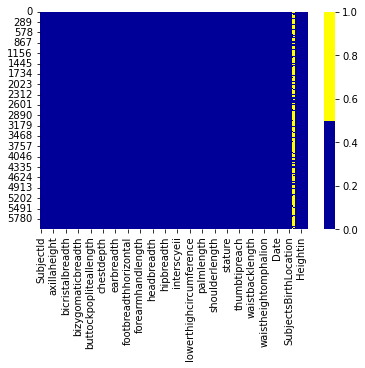

In [ ]:
cols = df.columns[:108] # all columns
colours = ['#000099', '#ffff00'] # specify the colours - blue is not missing. yellow is  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
SubjectId,10037,10038,10042,10043,10051,10053,10061,10070,10077,10080,10095,10101,10105,10111,10121,10127,10129,10131,10136,10138,10149,10158,10173,10175,10196,10210,10222,11394,11395,11396,11397,11404,11405,11407,11410,11510,11513,11519,11523,11525,...,11823,11828,11915,11916,11922,11923,11990,11991,11992,11993,11996,12036,12037,12040,12067,12071,12076,12081,12082,12087,12347,12469,12491,12703,12706,12708,12874,12881,12883,12901,12976,13010,13013,13019,13020,13027,13036,13064,13141,13144
abdominalextensiondepthsitting,231,194,183,261,309,272,261,229,213,281,274,284,279,214,265,225,193,201,233,214,325,245,181,236,226,300,207,270,246,209,256,235,266,305,326,205,243,197,298,287,...,229,286,248,247,219,236,227,210,223,201,223,198,222,225,300,239,266,272,267,217,272,244,253,216,280,221,217,246,229,218,263,184,262,187,277,257,236,269,209,183
acromialheight,1282,1379,1369,1356,1303,1428,1352,1383,1237,1301,1395,1360,1368,1368,1315,1371,1337,1387,1374,1309,1239,1356,1335,1382,1361,1290,1146,1343,1386,1330,1303,1368,1416,1385,1375,1347,1393,1270,1341,1309,...,1467,1391,1335,1343,1358,1383,1319,1321,1372,1316,1274,1281,1293,1372,1273,1455,1299,1350,1300,1360,1419,1508,1375,1376,1412,1222,1317,1328,1348,1244,1314,1346,1308,1355,1431,1233,1206,1354,1318,1273
acromionradialelength,301,320,329,306,308,326,306,327,308,278,318,331,342,325,320,312,307,302,342,294,278,328,307,303,326,288,249,308,320,329,296,312,333,318,311,325,343,310,315,283,...,337,341,305,310,310,324,318,297,326,303,304,287,304,313,299,334,292,319,297,329,329,346,320,311,329,289,290,317,314,305,306,316,307,319,333,274,277,321,304,281
anklecircumference,204,207,233,214,214,228,223,205,193,208,245,220,206,220,194,223,218,197,211,209,217,218,201,212,213,195,205,231,215,207,213,217,234,207,230,207,191,188,226,240,...,195,205,193,233,198,235,214,195,230,216,224,207,222,208,215,223,197,208,200,212,237,243,206,223,212,195,228,212,213,245,237,196,217,213,240,190,207,233,225,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DODRace,2,3,1,2,1,2,1,6,2,1,2,2,1,1,3,1,1,2,2,1,1,2,1,1,2,3,1,1,1,3,3,1,1,2,1,1,2,2,1,1,...,2,2,1,1,1,1,1,1,1,3,2,1,4,1,3,5,3,2,1,1,1,1,2,1,1,2,5,2,2,2,1,3,1,2,3,3,3,1,1,1
Age,26,21,23,22,45,44,21,23,24,37,33,36,40,24,30,36,19,19,33,34,31,29,31,33,19,23,23,21,24,30,30,28,22,40,42,26,40,29,37,26,...,35,28,26,27,25,27,22,24,26,27,20,36,44,34,26,22,29,44,38,22,25,18,34,20,33,36,29,23,35,19,30,42,38,24,35,32,41,40,42,33
Heightin,61,64,68,66,63,67,65,66,59,63,69,66,65,66,64,66,65,67,66,64,60,66,64,66,65,63,56,64,67,64,63,66,69,66,66,65,67,61,64,63,...,70,66,65,64,66,66,63,63,66,64,61,62,64,67,61,69,62,66,63,66,68,73,65,67,67,61,63,65,66,61,63,65,65,66,69,60,60,65,64,62
Weightlbs,142,120,147,175,195,180,165,168,118,150,212,150,169,158,160,145,137,130,160,130,172,165,110,150,150,159,107,154,160,137,145,155,155,185,200,134,127,120,166,175,...,156,185,135,182,145,155,145,126,180,130,140,123,132,145,150,160,150,150,160,150,187,184,170,136,174,136,148,153,148,135,170,129,156,125,185,122,137,160,146,110


In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

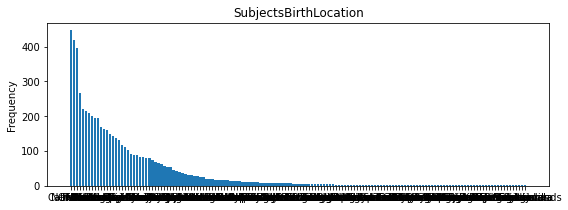

SubjectsBirthLocation: 
 California    446
New York      420
Texas         397
Indiana       266
Oklahoma      221
             ... 
Zambia          1
Bahamas         1
Serbia          1
Sri Lanka       1
Guatemala       1
Name: SubjectsBirthLocation, Length: 152, dtype: int64


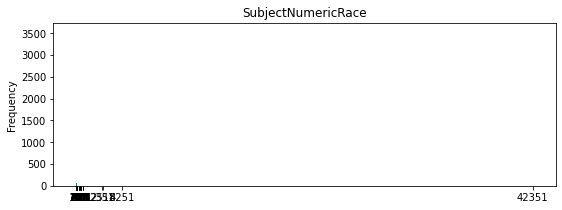

SubjectNumericRace: 
 1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64


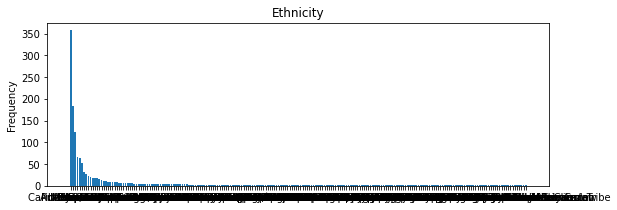

Ethnicity: 
 Mexican                              357
Puerto Rican                         183
Caribbean Islander                   124
Filipino                              67
Cherokee                              65
                                    ... 
Creek Samoan                           1
Omaha                                  1
Algonquin Navajo Penobscot             1
Undisclosed Native American Tribe      1
Blackfoot Cherokee Choctaw             1
Name: Ethnicity, Length: 209, dtype: int64


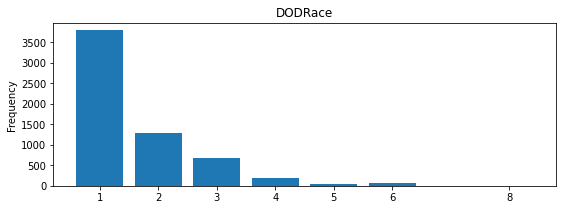

DODRace: 
 1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


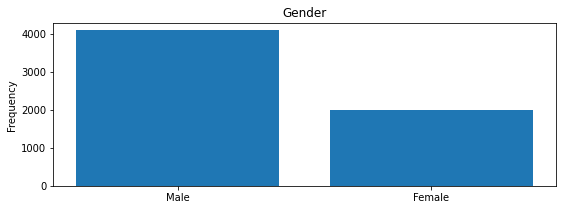

Gender: 
 Male      4082
Female    1986
Name: Gender, dtype: int64


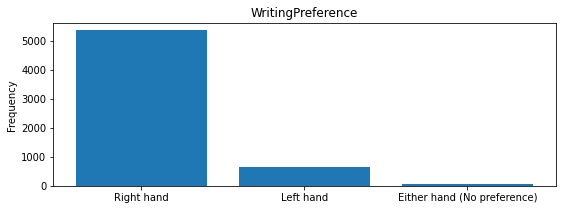

WritingPreference: 
 Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64


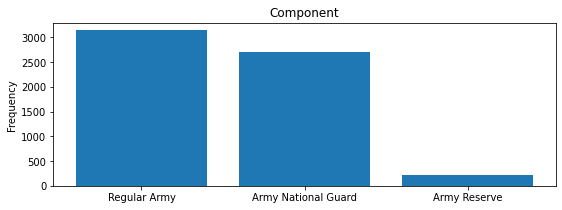

Component: 
 Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64


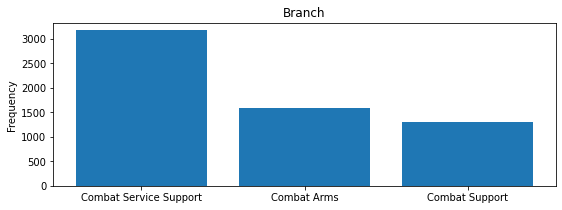

Branch: 
 Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64


In [ ]:
category1 = ['SubjectsBirthLocation','SubjectNumericRace','Ethnicity','DODRace','Gender','WritingPreference','Component','Branch']
for c in category1:
    bar_plot(c)

#Numeric Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
df.head(60).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
SubjectId,10037,10038,10042,10043,10051,10053,10061,10070,10077,10080,10095,10101,10105,10111,10121,10127,10129,10131,10136,10138,10149,10158,10173,10175,10196,10210,10222,11394,11395,11396,11397,11404,11405,11407,11410,11510,11513,11519,11523,11525,11528,11529,11530,11533,11537,11593,11742,11767,11771,11773,11782,11783,11785,11802,11803,11811,11814,11815,11818,11821
abdominalextensiondepthsitting,231,194,183,261,309,272,261,229,213,281,274,284,279,214,265,225,193,201,233,214,325,245,181,236,226,300,207,270,246,209,256,235,266,305,326,205,243,197,298,287,352,241,274,289,246,277,230,277,210,189,225,358,309,291,238,234,204,263,236,209
acromialheight,1282,1379,1369,1356,1303,1428,1352,1383,1237,1301,1395,1360,1368,1368,1315,1371,1337,1387,1374,1309,1239,1356,1335,1382,1361,1290,1146,1343,1386,1330,1303,1368,1416,1385,1375,1347,1393,1270,1341,1309,1355,1375,1333,1319,1304,1356,1333,1350,1405,1300,1408,1416,1407,1314,1238,1247,1334,1316,1316,1300
acromionradialelength,301,320,329,306,308,326,306,327,308,278,318,331,342,325,320,312,307,302,342,294,278,328,307,303,326,288,249,308,320,329,296,312,333,318,311,325,343,310,315,283,294,308,312,303,309,312,331,326,332,293,331,318,346,300,285,284,307,311,323,312
anklecircumference,204,207,233,214,214,228,223,205,193,208,245,220,206,220,194,223,218,197,211,209,217,218,201,212,213,195,205,231,215,207,213,217,234,207,230,207,191,188,226,240,233,221,242,216,214,218,212,200,217,199,215,238,242,211,218,220,213,221,217,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DODRace,2,3,1,2,1,2,1,6,2,1,2,2,1,1,3,1,1,2,2,1,1,2,1,1,2,3,1,1,1,3,3,1,1,2,1,1,2,2,1,1,1,1,1,1,6,1,1,2,1,2,1,1,1,1,1,3,1,3,1,1
Age,26,21,23,22,45,44,21,23,24,37,33,36,40,24,30,36,19,19,33,34,31,29,31,33,19,23,23,21,24,30,30,28,22,40,42,26,40,29,37,26,31,28,25,26,35,22,40,43,20,26,24,27,41,30,25,24,21,24,29,23
Heightin,61,64,68,66,63,67,65,66,59,63,69,66,65,66,64,66,65,67,66,64,60,66,64,66,65,63,56,64,67,64,63,66,69,66,66,65,67,61,64,63,65,67,65,64,63,66,65,64,68,63,67,80,68,64,62,61,65,63,65,64
Weightlbs,142,120,147,175,195,180,165,168,118,150,212,150,169,158,160,145,137,130,160,130,172,165,110,150,150,159,107,154,160,137,145,155,155,185,200,134,127,120,166,175,180,155,164,163,175,170,155,153,145,103,150,270,196,165,150,133,128,153,160,130


In [ ]:
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numericVar = df_numeric.columns.values

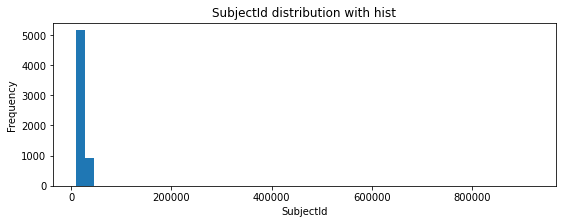

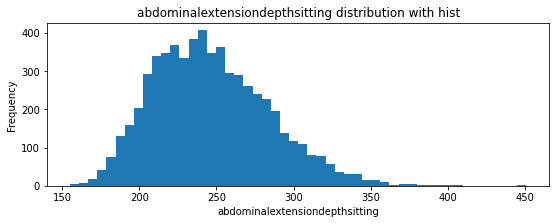

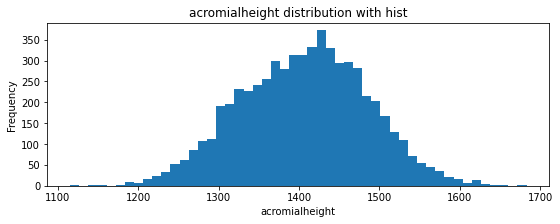

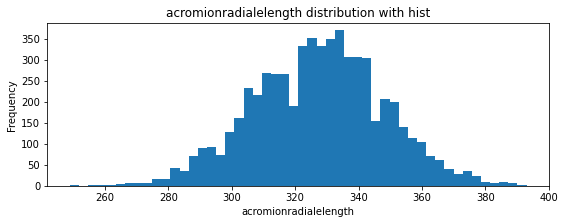

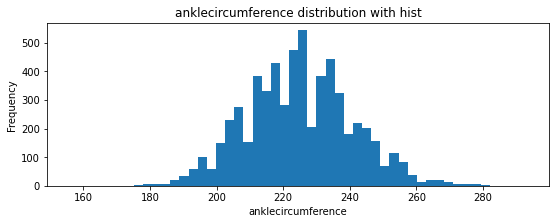

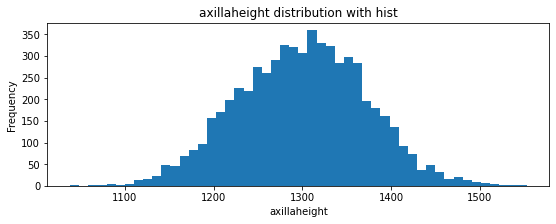

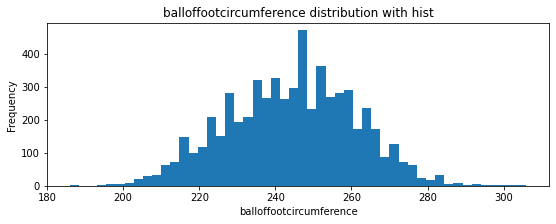

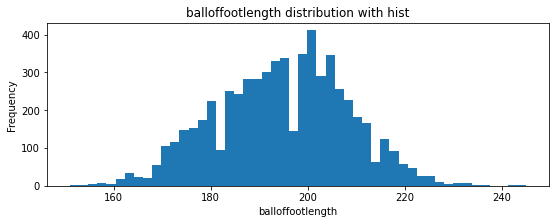

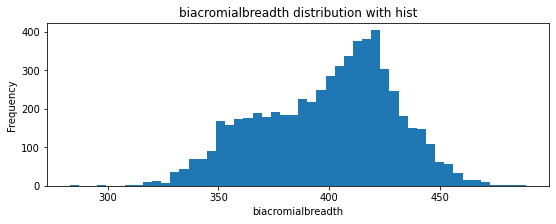

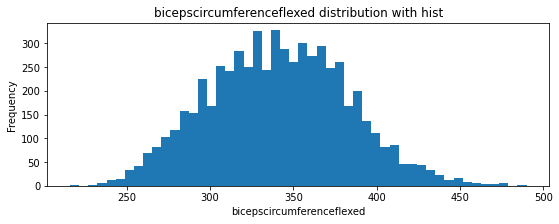

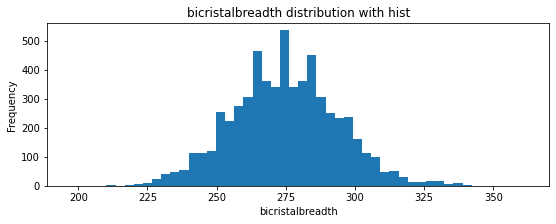

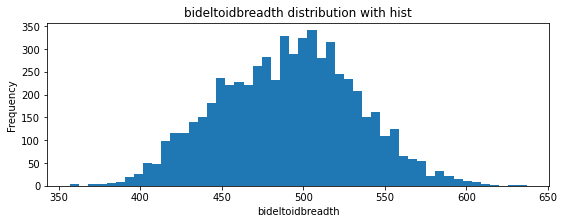

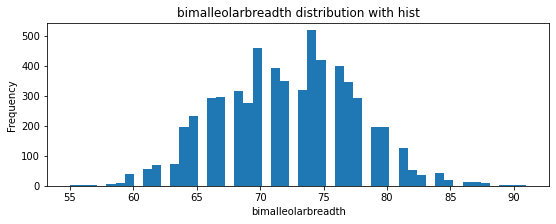

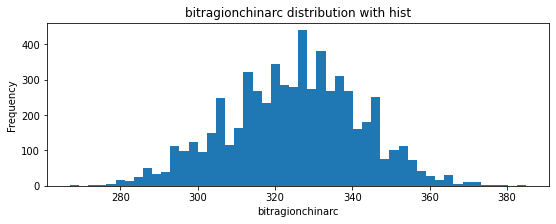

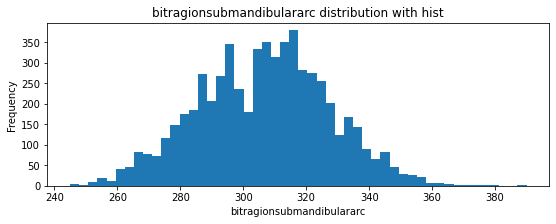

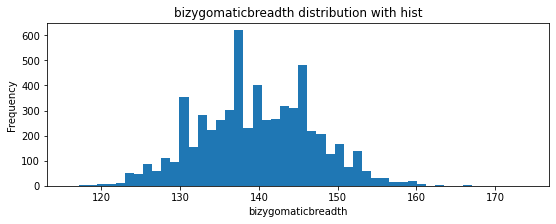

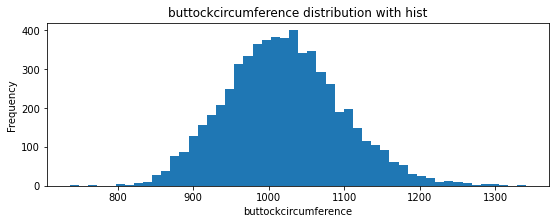

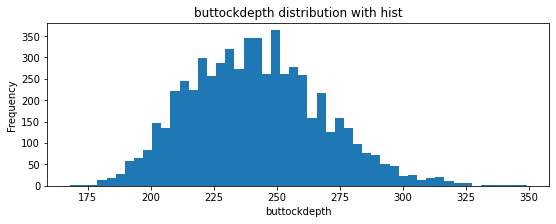

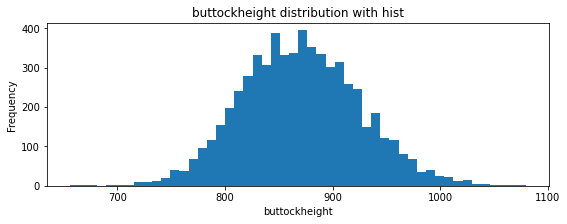

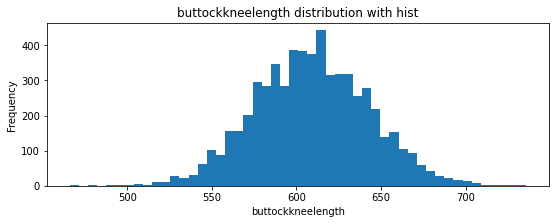

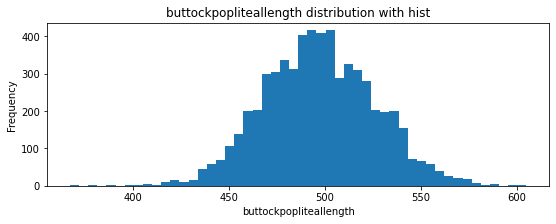

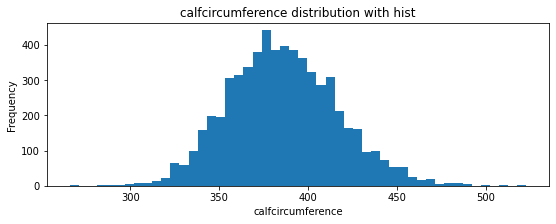

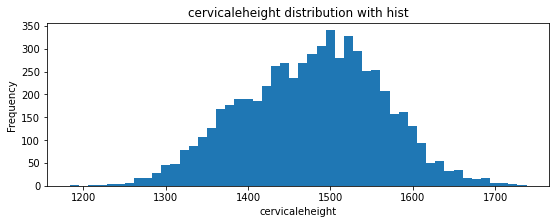

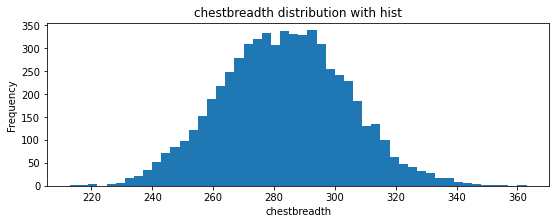

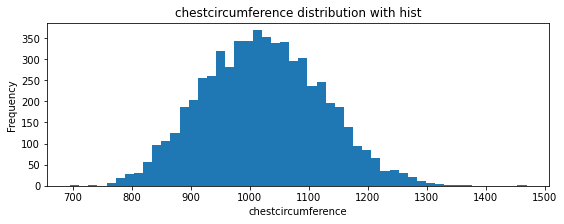

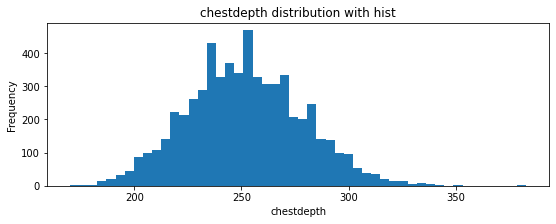

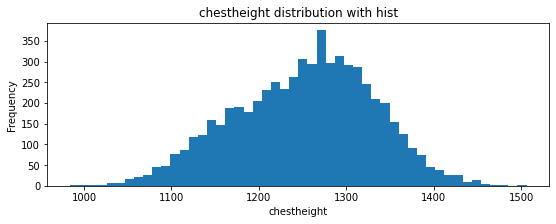

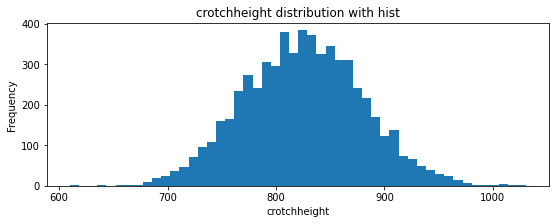

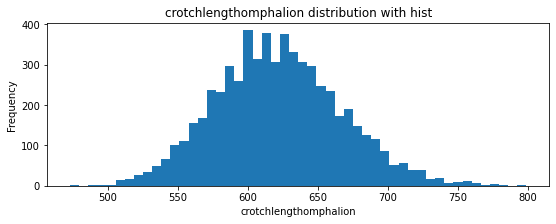

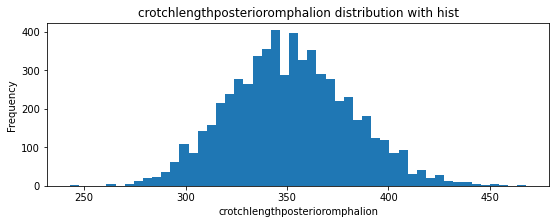

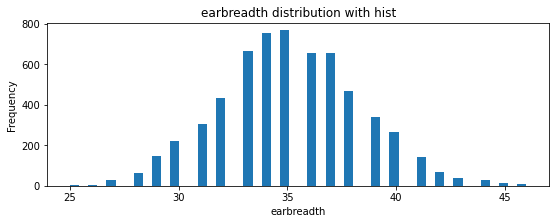

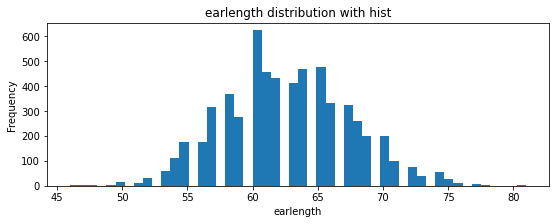

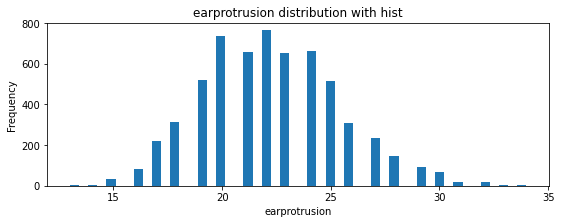

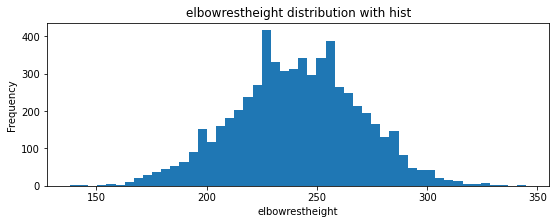

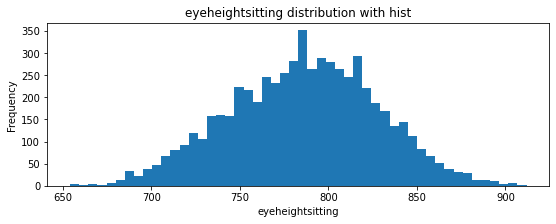

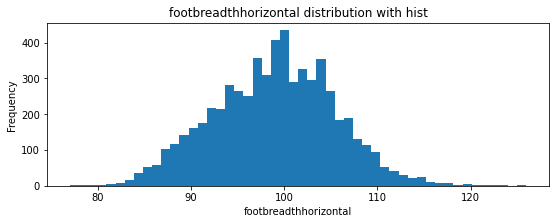

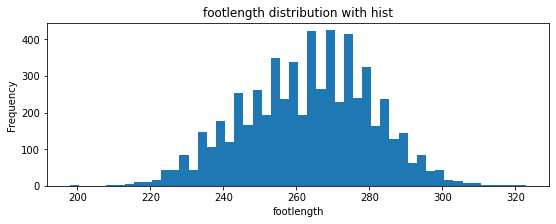

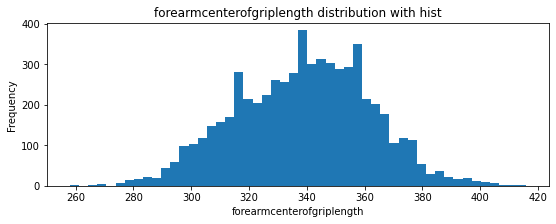

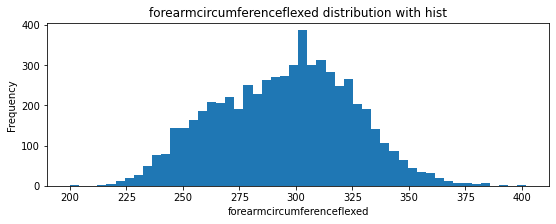

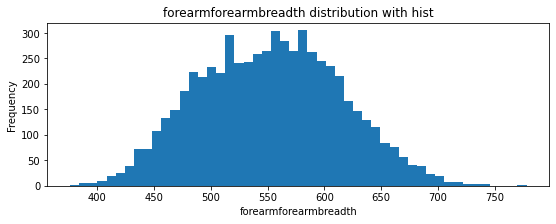

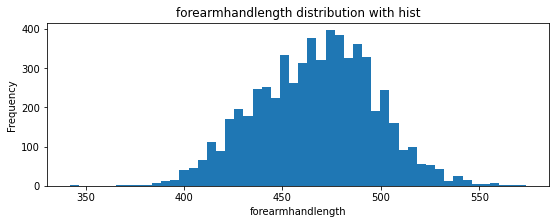

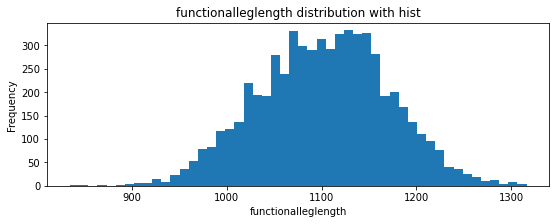

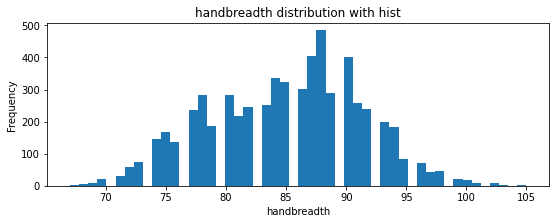

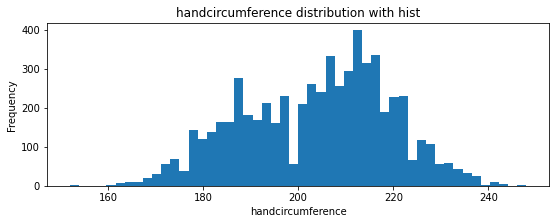

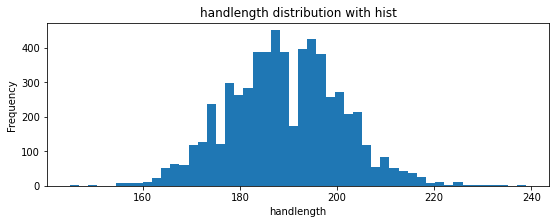

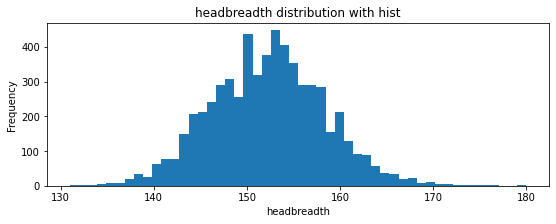

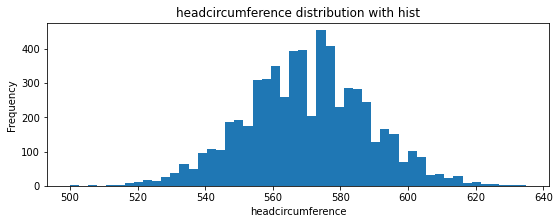

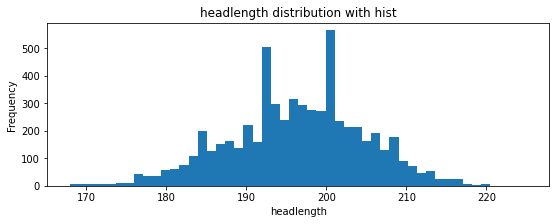

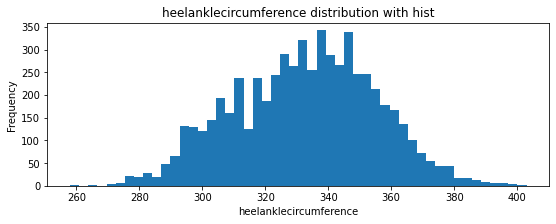

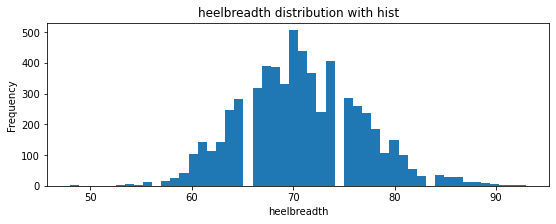

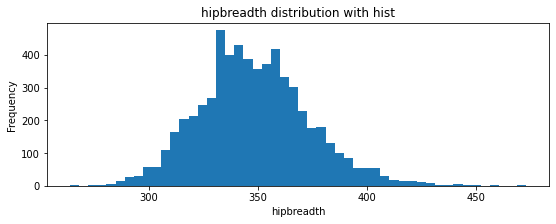

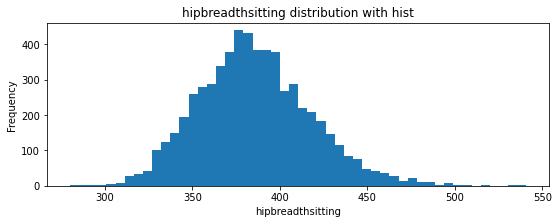

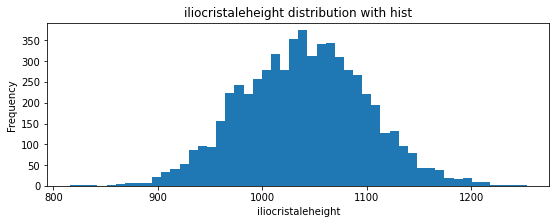

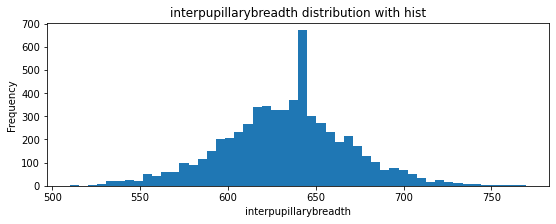

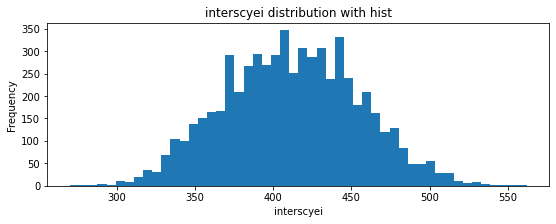

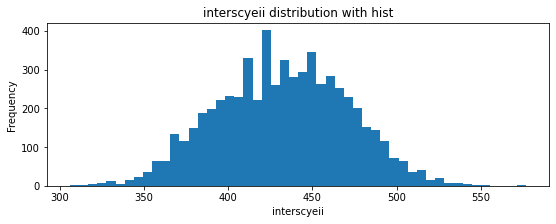

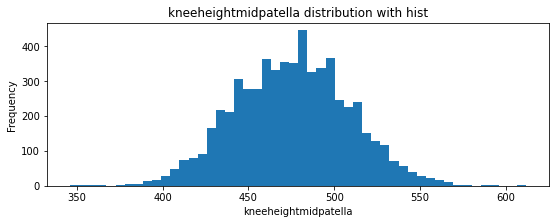

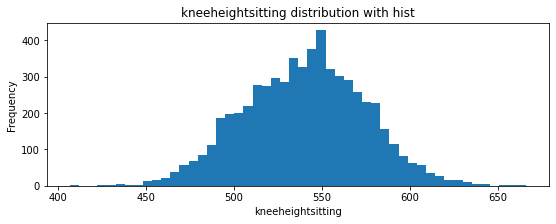

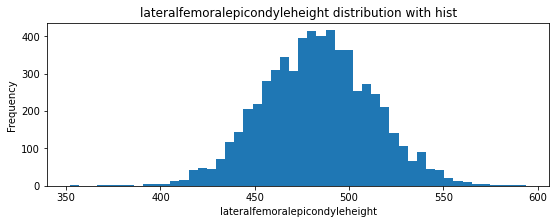

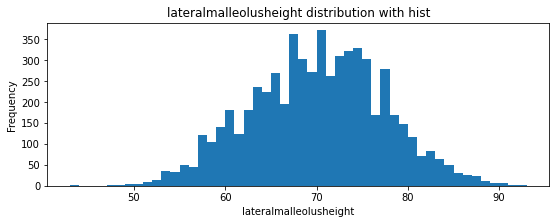

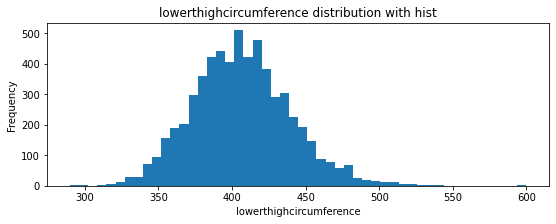

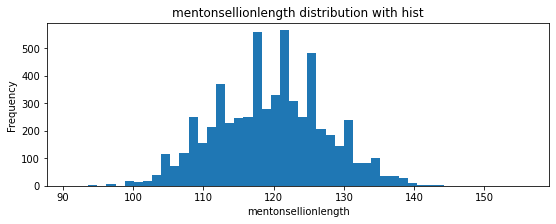

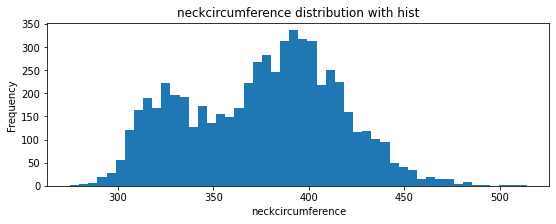

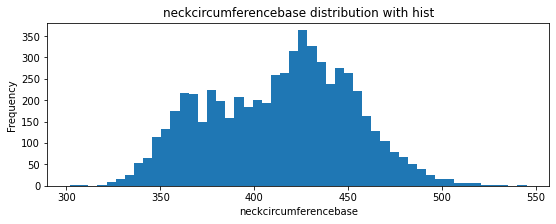

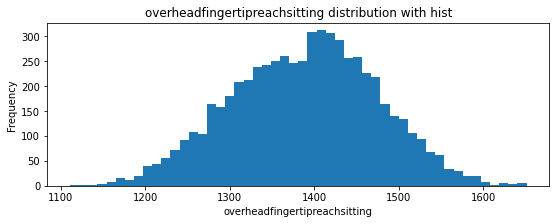

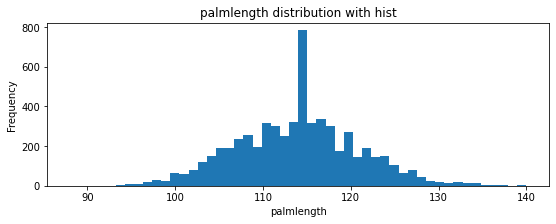

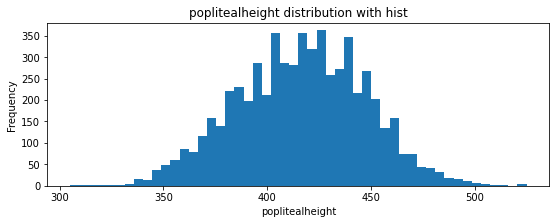

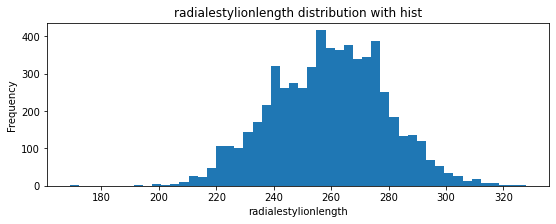

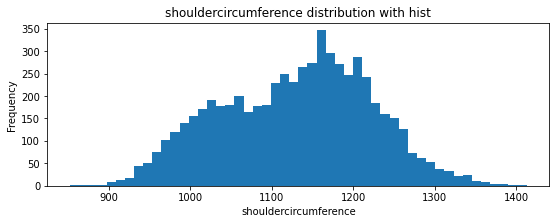

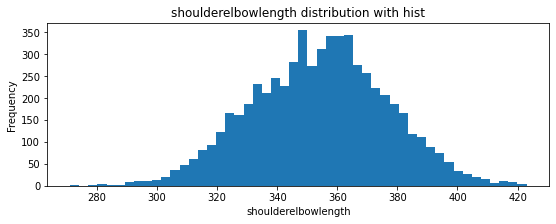

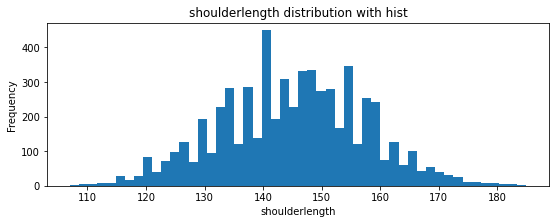

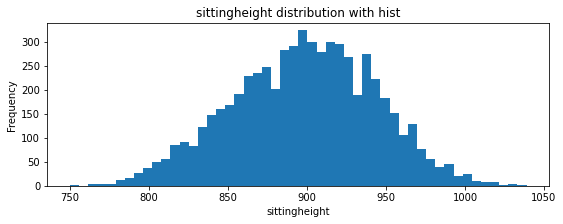

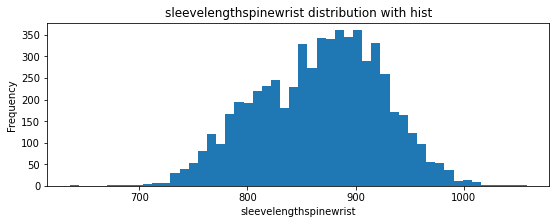

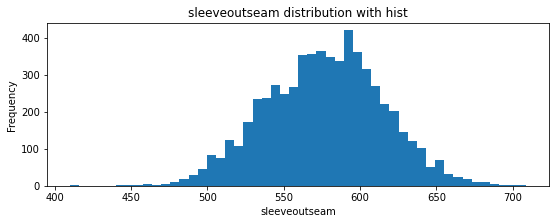

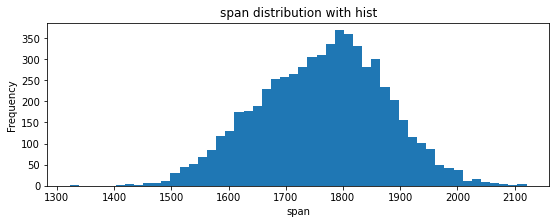

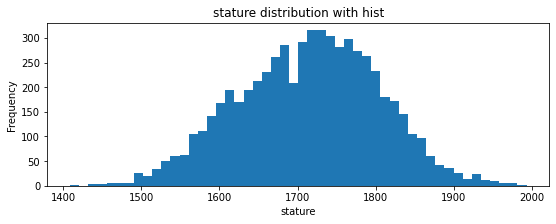

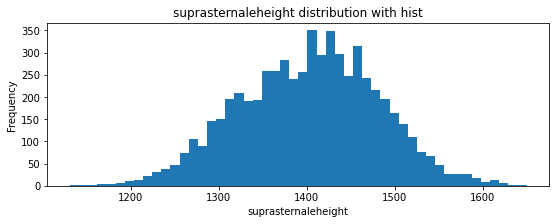

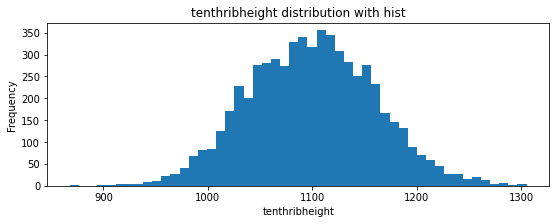

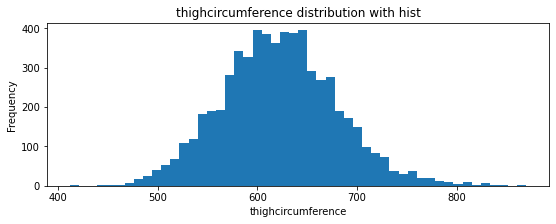

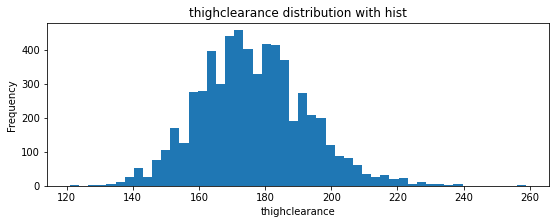

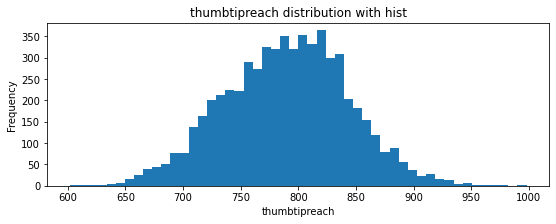

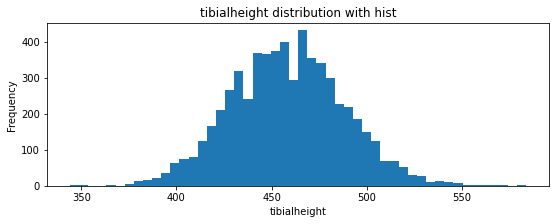

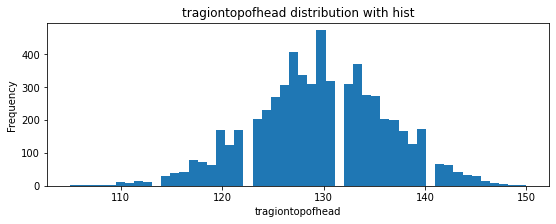

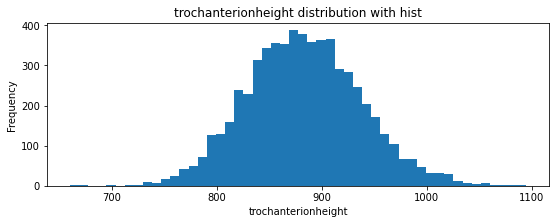

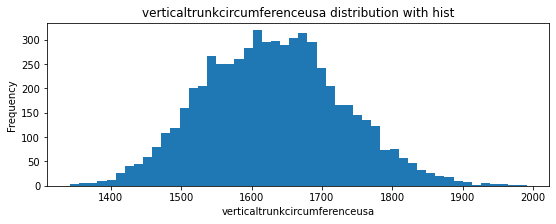

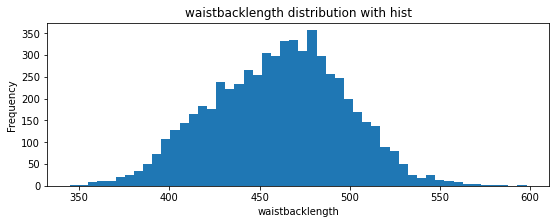

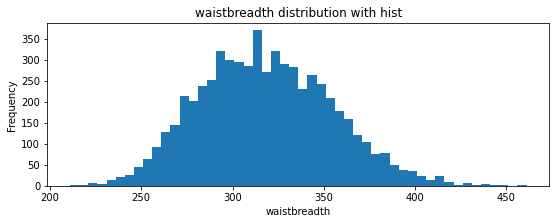

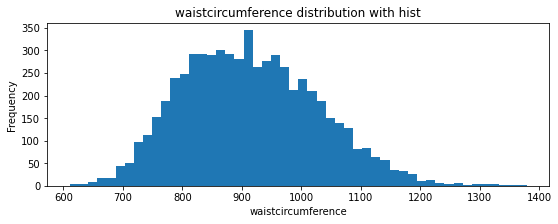

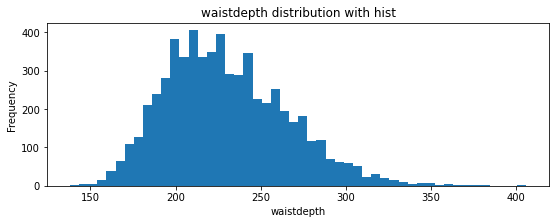

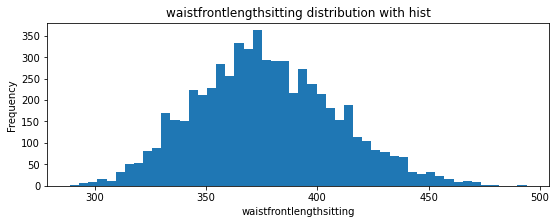

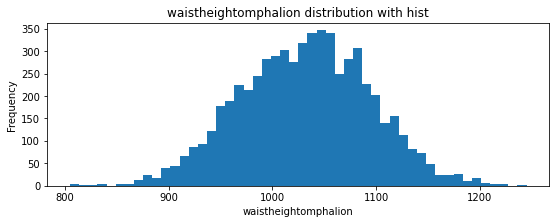

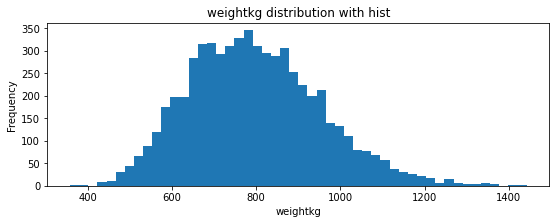

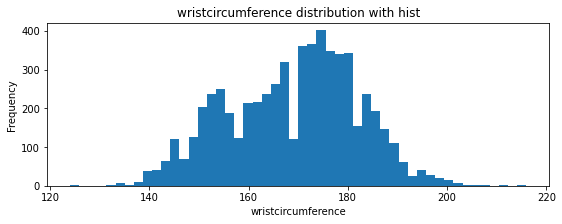

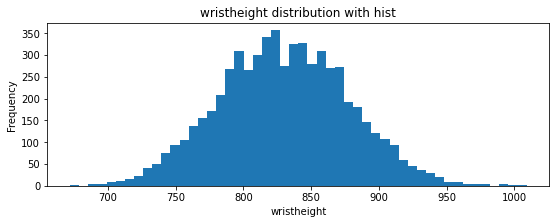

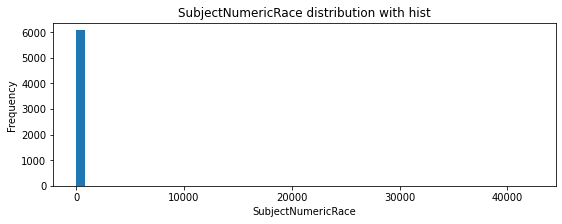

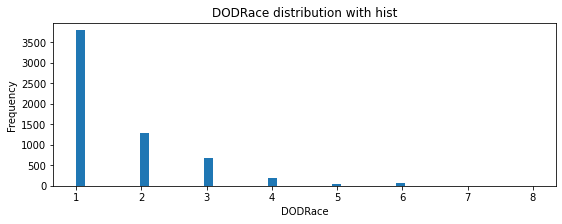

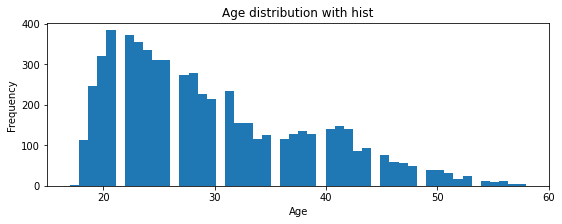

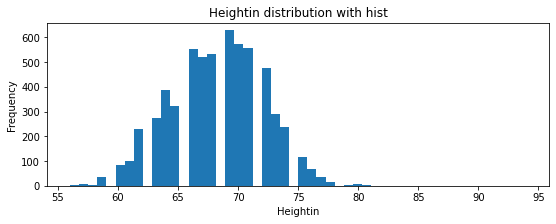

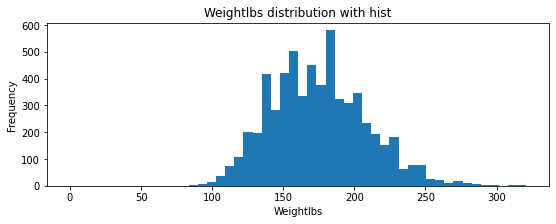

In [ ]:

for n in numericVar:
    plot_hist(n)

In [ ]:
df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,...,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,...,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,...,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,...,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,...,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29442,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,277,533,...,1096,348,150,883,865,568,1688,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,675,163,778,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
6064,29443,247,1473,336,234,13

#Missing Values and outleir Handling 

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
from collections import Counter

In [ ]:
df.loc[detect_outliers(df,numericVar)]

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
40,11528,352,1355,294,233,1246,241,180,373,371,326,508,69,325,317,137,1175,349,846,614,494,403,1406,282,1060,302,1169,744,710,451,35,61,23,262,754,95,248,319,308,574,...,1133,317,149,879,768,513,1609,1641,1344,1056,720,202,789,440,133,846,1750,517,374,1134,320,394,912,894,166,843,Female,29-Oct-10,Fort Hood,Regular Army,Combat Support,68W,Texas,1,NaN,1,31,65,180,Right hand
51,11783,358,1416,318,238,1295,256,185,349,435,362,494,67,320,305,140,1306,314,908,683,533,482,1475,313,1161,300,1221,804,705,405,32,67,21,289,808,99,256,330,311,598,...,1146,334,157,921,824,544,1689,1720,1410,1128,870,239,789,460,136,879,1789,532,461,1334,360,377,990,1196,167,853,Female,3-Nov-10,Fort Hood,Regular Army,Combat Support,68W,Wisconsin,1,NaN,1,27,80,270,Right hand
1611,28154,353,1438,338,230,1323,261,199,381,405,338,552,75,346,331,145,1261,310,898,696,563,427,1497,336,1266,334,1223,851,715,360,41,64,16,253,766,107,267,343,314,667,...,1225,359,139,873,890,586,1793,1711,1397,1136,788,216,784,484,122,918,1804,509,440,1305,367,365,1020,1166,177,870,Female,24-Feb-12,Camp Shelby,Army National Guard,Combat Service Support,92G,Antigua and Barbuda,8,Caribbean Islander,2,31,68,260,Right hand
2041,10525,451,1525,375,260,1385,272,216,448,461,334,567,80,375,390,160,1265,339,971,674,533,456,1600,363,1469,383,1349,897,689,332,35,72,20,255,840,107,283,388,379,778,...,1309,396,147,954,1015,650,1993,1840,1528,1177,781,223,894,526,135,983,1954,580,438,1379,406,441,1063,1400,197,893,Male,13-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,Mississippi,1,NaN,1,33,72,310,Right hand
2104,10761,404,1568,352,274,1427,297,215,447,445,310,607,87,363,356,154,1234,338,1011,690,550,443,1627,363,1358,315,1411,920,737,408,41,73,21,289,823,117,294,376,361,728,...,1368,381,160,927,997,615,1919,1846,1544,1202,797,222,839,526,130,1011,1940,543,406,1330,373,440,1114,1413,200,935,Male,15-Oct-10,Fort Hood,Regular Army,Combat Service Support,92F,California,31,Mexican,3,28,74,315,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,18196,190,1241,283,190,1166,209,163,351,258,234,404,63,305,294,135,870,192,738,537,447,334,1320,242,812,198,1091,708,600,343,30,60,20,245,737,82,224,276,235,460,...,962,310,132,843,743,490,1531,1541,1241,989,513,139,638,410,113,767,1421,398,239,706,168,346,914,478,145,741,Female,7-Jul-11,Fort Lee,Army National Guard,Combat Service Support,91D,Philippines,6,Filipino,6,25,61,106,L

In [ ]:
df.drop(detect_outliers(df,numericVar), inplace=True)

In [ ]:
df['DODRace'].value_counts()

1    3652
2    1206
3     647
4     144
6      44
5      38
8       3
Name: DODRace, dtype: int64

##Now, let's take a closer look at correlation of continuous columns.

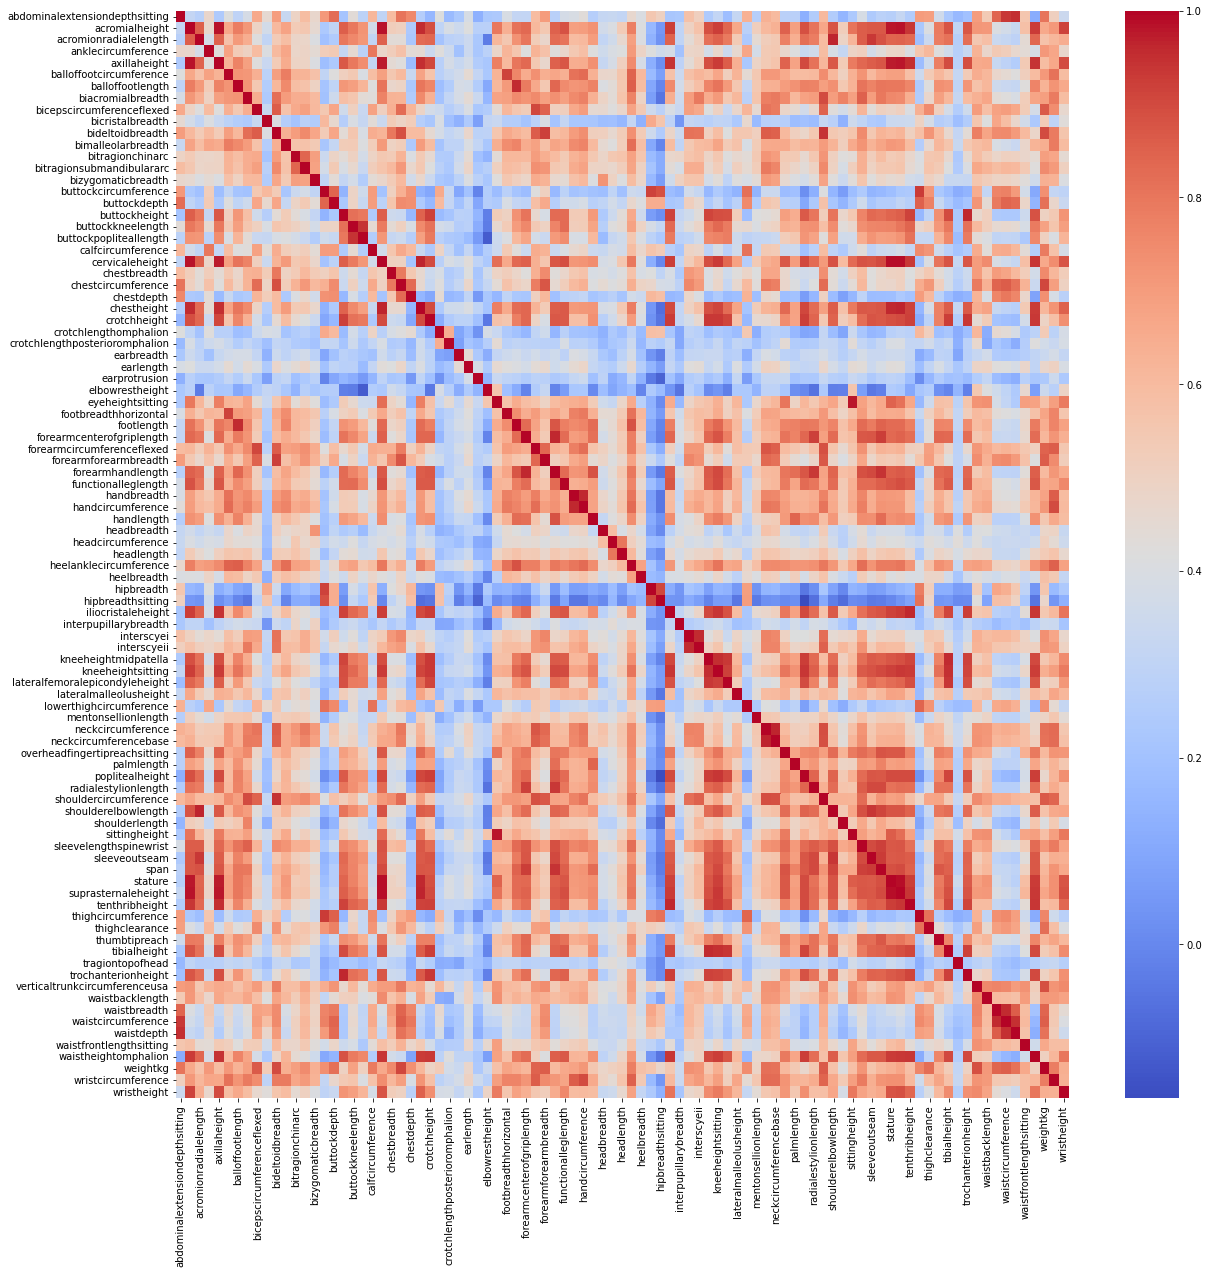

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.select_dtypes(include=[np.number]).columns.values].corr(),cmap ="coolwarm" )
plt.show()

In [ ]:
df.Ethnicity.value_counts(dropna=False)

NaN                                             4454
Mexican                                          341
Puerto Rican                                     176
Caribbean Islander                               114
Cherokee                                          59
Filipino                                          55
Korean                                            37
Dominican                                         27
Japanese                                          18
Vietnamese                                        17
Chinese                                           17
Cuban                                             16
Arab or Middle Eastern                            16
Salvadoran                                        16
Colombian                                         15
East/Asian Indian                                 12
Mexican Puerto Rican                              10
Panamanian                                         9
Peruvian                                      

In [ ]:
df.drop(columns=['Ethnicity','SubjectId','SubjectNumericRace','Age','Heightin',
                 'WritingPreference','Weightlbs','Date','Installation',
                 'Component','PrimaryMOS'], axis=1, inplace=True)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 6067
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5734 non-null   int64 
 1   acromialheight                  5734 non-null   int64 
 2   acromionradialelength           5734 non-null   int64 
 3   anklecircumference              5734 non-null   int64 
 4   axillaheight                    5734 non-null   int64 
 5   balloffootcircumference         5734 non-null   int64 
 6   balloffootlength                5734 non-null   int64 
 7   biacromialbreadth               5734 non-null   int64 
 8   bicepscircumferenceflexed       5734 non-null   int64 
 9   bicristalbreadth                5734 non-null   int64 
 10  bideltoidbreadth                5734 non-null   int64 
 11  bimalleolarbreadth              5734 non-null   int64 
 12  bitragionchinarc                5734 non-null   

In [ ]:
df["DODRace"] = df.DODRace.map({
                                    1: "White",
                                    2: "Black",
                                    3: "Hispanic",
                                    4: "Asian",
                                    5: "Other",
                                    6: "Other",
                                    8: "Other"
                                    })

In [ ]:
df.DODRace.value_counts()

White       3652
Black       1206
Hispanic     647
Asian        144
Other         85
Name: DODRace, dtype: int64

In [ ]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")

In [ ]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [ ]:
df_Eda=df.to_csv('df_eda.csv')

In [ ]:
df=pd.read_csv('/content/df_eda.csv')

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df.drop("DODRace",axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify =y)

<IPython.core.display.Javascript object>

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
pipe_log_model = Pipeline(steps=operations)

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 14   1   3   7   4]
 [  4 220   8   2   7]
 [  3  10  91   6  19]
 [  6   0   4   3   4]
 [ 23  19  79  51 559]]
              precision    recall  f1-score   support

       Asian       0.28      0.48      0.35        29
       Black       0.88      0.91      0.90       241
    Hispanic       0.49      0.71      0.58       129
       Other       0.04      0.18      0.07        17
       White       0.94      0.76      0.84       731

    accuracy                           0.77      1147
   macro avg       0.53      0.61      0.55      1147
weighted avg       0.85      0.77      0.80      1147


Train_Set
[[  95    0    6   11    3]
 [   3  888   37   13   24]
 [  25   20  407   13   53]
 [   3    2    1   58    4]
 [ 118   66  305  211 2221]]
              precision    recall  f1-score   support

       Asian       0.39      0.83      0.53       115
       Black       0.91      0.92      0.91       965
    Hispanic       0.54      0.79      0.64       518
       Other     

#Asian and other nationalities consist few information to train, and it affects negtively other scores.Therefore we need to drop them.

In [ ]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Combat Support,Germany,Black
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,Combat Service Support,California,Hispanic
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Combat Service Support,Texas,White
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,Combat Service Support,District of Columbia,Black
5,272,1428,326,228,1326,229,201,356,342,283,470,67,335,297,147,1085,279,946,656,526,396,1485,285,1031,301,1275,864,634,363,35,61,15,233,755,93,270,358,297,509,491,1145,78,188,198,146,570,194,333,70,358,409,1080,705,372,380,478,542,495,63,423,126,354,379,1412,124,401,271,1094,348,136,860,847,592,1777,1707,1414,1141,674,196,803,474,127,922,1666,466,333,968,255,367,1053,837,159,844,Female,Combat Service Support,Germany,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
X =df.drop("DODRace",axis=1)
X = pd.get_dummies(X, drop_first=True)
y =df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify =y)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
pipe_log_model = Pipeline(steps=operations)

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[327  29   6]
 [  7 153  34]
 [ 31 144 921]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       362
    Hispanic       0.47      0.79      0.59       194
       White       0.96      0.84      0.90      1096

    accuracy                           0.85      1652
   macro avg       0.77      0.84      0.79      1652
weighted avg       0.89      0.85      0.86      1652


Train_Set
[[ 797   23   24]
 [  15  385   53]
 [  60  282 2214]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       844
    Hispanic       0.56      0.85      0.67       453
       White       0.97      0.87      0.91      2556

    accuracy                           0.88      3853
   macro avg       0.81      0.89      0.84      3853
weighted avg       0.91      0.88      0.89      3853



##as we can seee now we get better scores without  data about Asian and other natioanlities 

In [ ]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.615
test_precision_Hispanic   0.507
test_recall_Hispanic      0.784
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=10)

In [ ]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
log_model_grid.best_params_


{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [ ]:
log_model_grid.best_score_

0.783574879227053

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[327  29   6]
 [  7 153  34]
 [ 31 144 921]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       362
    Hispanic       0.47      0.79      0.59       194
       White       0.96      0.84      0.90      1096

    accuracy                           0.85      1652
   macro avg       0.77      0.84      0.79      1652
weighted avg       0.89      0.85      0.86      1652


Train_Set
[[ 797   23   24]
 [  15  385   53]
 [  60  282 2214]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       844
    Hispanic       0.56      0.85      0.67       453
       White       0.97      0.87      0.91      2556

    accuracy                           0.88      3853
   macro avg       0.81      0.89      0.84      3853
weighted avg       0.91      0.88      0.89      3853



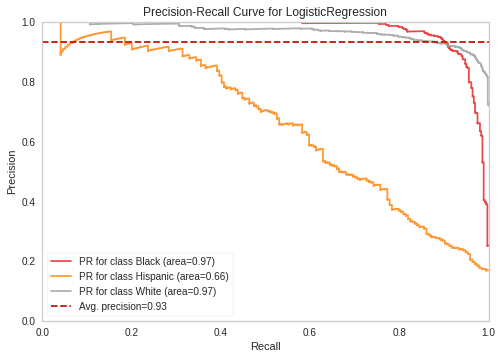

In [ ]:


operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
viz.score_#["Hispanic"]

{'Black': 0.9722039218622711,
 'Hispanic': 0.6608149848132192,
 'White': 0.9679652159135178,
 'micro': 0.9319210049850866}

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

Lojistic Regression solver "liblenear"

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced' ,max_iter=10000,random_state=seed,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [ ]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[ 335   12   15]
 [  12  117   65]
 [  23   55 1018]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       362
    Hispanic       0.64      0.60      0.62       194
       White       0.93      0.93      0.93      1096

    accuracy                           0.89      1652
   macro avg       0.82      0.82      0.82      1652
weighted avg       0.89      0.89      0.89      1652


Train_Set
[[ 796   11   37]
 [  24  321  108]
 [  43  117 2396]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       844
    Hispanic       0.71      0.71      0.71       453
       White       0.94      0.94      0.94      2556

    accuracy                           0.91      3853
   macro avg       0.86      0.86      0.86      3853
weighted avg       0.91      0.91      0.91      3853



In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.641
test_precision_Hispanic   0.656
test_recall_Hispanic      0.629
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=seed))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[325  25  12]
 [  9 139  46]
 [ 22 139 935]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       362
    Hispanic       0.46      0.72      0.56       194
       White       0.94      0.85      0.90      1096

    accuracy                           0.85      1652
   macro avg       0.77      0.82      0.79      1652
weighted avg       0.88      0.85      0.86      1652


Train_Set
[[ 783   26   35]
 [  14  374   65]
 [  49  317 2190]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       844
    Hispanic       0.52      0.83      0.64       453
       White       0.96      0.86      0.90      2556

    accuracy                           0.87      3853
   macro avg       0.80      0.87      0.82      3853
weighted avg       0.90      0.87      0.88      3853



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.576
test_precision_Hispanic   0.469
test_recall_Hispanic      0.750
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=seed))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [ ]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=5))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 'scale'}

In [ ]:
svm_model_grid.best_score_

0.7614652014652015

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[330  25   7]
 [  9 143  42]
 [ 19 127 950]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       362
    Hispanic       0.48      0.74      0.58       194
       White       0.95      0.87      0.91      1096

    accuracy                           0.86      1652
   macro avg       0.79      0.84      0.80      1652
weighted avg       0.89      0.86      0.87      1652


Train_Set
[[ 802   20   22]
 [   9  401   43]
 [  46  275 2235]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94       844
    Hispanic       0.58      0.89      0.70       453
       White       0.97      0.87      0.92      2556

    accuracy                           0.89      3853
   macro avg       0.83      0.90      0.85      3853
weighted avg       0.92      0.89      0.90      3853



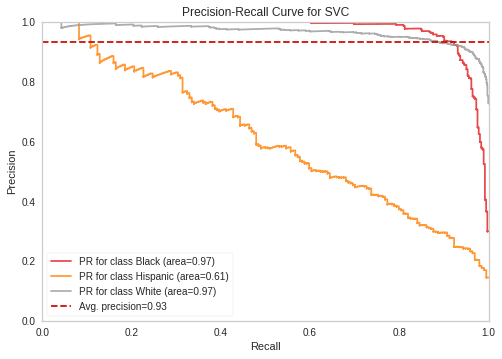

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=3, class_weight="balanced",random_state=seed))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. Random Forest

In [ ]:
Xf = df.drop("DODRace",axis=1)
yf = df.DODRace

In [ ]:
catagoricals = Xf.select_dtypes("object").columns
catagoricals

Index(['Gender', 'Branch', 'SubjectsBirthLocation'], dtype='object')

In [ ]:
enc = OrdinalEncoder()
Xf[catagoricals] = enc.fit_transform(Xf[catagoricals])
Xf.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.000,2.000,38.000
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.000,1.000,16.000
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.000,1.000,114.000
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0.000,1.000,27.000
4,272,1428,326,228,1326,229,201,356,342,283,470,67,335,297,147,1085,279,946,656,526,396,1485,285,1031,301,1275,864,634,363,35,61,15,233,755,93,270,358,297,509,491,1145,78,188,198,146,570,194,333,70,358,409,1080,705,372,380,478,542,495,63,423,126,354,379,1412,124,401,271,1094,348,136,860,847,592,1777,1707,1414,1141,674,196,803,474,127,922,1666,466,333,968,255,367,1053,837,159,844,0.000,1.000,38.000


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xf, yf, test_size=0.1, random_state=seed, stratify =y)

<IPython.core.display.Javascript object>

In [ ]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (3853, 96)
Train target shape   :  (3853,)
Test features shape  :  (1652, 96)
Test target shape    :  (1652,)


### Vanilla RF Model

In [ ]:
rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=seed)
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=5)

In [ ]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[ 402    1  200]
 [  21   15  288]
 [  21    4 1801]]
              precision    recall  f1-score   support

       Black       0.91      0.67      0.77       603
    Hispanic       0.75      0.05      0.09       324
       White       0.79      0.99      0.88      1826

    accuracy                           0.81      2753
   macro avg       0.81      0.57      0.58      2753
weighted avg       0.81      0.81      0.76      2753


Train_Set
[[ 603    0    0]
 [   0  323    0]
 [   0    0 1826]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       603
    Hispanic       1.00      1.00      1.00       323
       White       1.00      1.00      1.00      1826

    accuracy                           1.00      2752
   macro avg       1.00      1.00      1.00      2752
weighted avg       1.00      1.00      1.00      2752



### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[32,64],
             'max_depth':[3,5,14,16], 'max_leaf_nodes':[5,14,16],'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20], 'max_samples' : [ None, 15, 20]} #
             

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=seed)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [ ]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 14, 16],
                         'max_features': ['auto', None, 15, 20],
                         'max_leaf_nodes': [5, 14, 16],
                         'max_samples': [None, 15, 20],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [32, 64]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 14,
 'max_samples': None,
 'min_samples_split': 18,
 'n_estimators': 64}

In [ ]:
rf_grid_model.best_score_

0.6049071618037136

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[ 90  15  16]
 [  5  37  23]
 [ 30 131 204]]
              precision    recall  f1-score   support

       Black       0.72      0.74      0.73       121
    Hispanic       0.20      0.57      0.30        65
       White       0.84      0.56      0.67       365

    accuracy                           0.60       551
   macro avg       0.59      0.62      0.57       551
weighted avg       0.74      0.60      0.64       551


Train_Set
[[ 831  143  111]
 [  61  371  150]
 [ 255 1066 1966]]
              precision    recall  f1-score   support

       Black       0.72      0.77      0.74      1085
    Hispanic       0.23      0.64      0.34       582
       White       0.88      0.60      0.71      3287

    accuracy                           0.64      4954
   macro avg       0.61      0.67      0.60      4954
weighted avg       0.77      0.64      0.68      4954



In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=seed, max_depth= 3,
 max_features='auto',
 max_leaf_nodes= 14,
 max_samples= None,
 min_samples_split=18,
 n_estimators= 64)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.320
test_precision_Hispanic   0.219
test_recall_Hispanic      0.591
dtype: float64

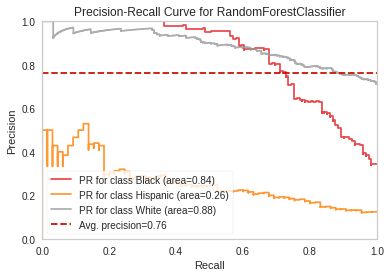

In [ ]:
 

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=seed)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([1.52196621, 0.50238313, 1.52196621, ..., 0.50238313, 1.52196621,
       0.50238313])

In [ ]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=5)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[101  12   8]
 [  2  40  23]
 [ 12  68 285]]
              precision    recall  f1-score   support

       Black       0.88      0.83      0.86       121
    Hispanic       0.33      0.62      0.43        65
       White       0.90      0.78      0.84       365

    accuracy                           0.77       551
   macro avg       0.70      0.74      0.71       551
weighted avg       0.83      0.77      0.79       551


Train_Set
[[1022   29   34]
 [  23  486   73]
 [ 101  362 2824]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1085
    Hispanic       0.55      0.84      0.67       582
       White       0.96      0.86      0.91      3287

    accuracy                           0.87      4954
   macro avg       0.80      0.88      0.83      4954
weighted avg       0.90      0.87      0.88      4954



In [ ]:
model = XGBClassifier(random_state=seed)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.508
test_precision_Hispanic   0.423
test_recall_Hispanic      0.637
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.522    1085
Hispanic  2.837     582
White     0.502    3287
Name: 0, dtype: int64

In [ ]:
param_grid = {"n_estimators":[64, 128],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=seed)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 128,
 'subsample': 1}

In [ ]:
xgb_grid_model.best_score_

0.6306808134394342

In [ ]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[102  11   8]
 [  4  38  23]
 [ 11  62 292]]
              precision    recall  f1-score   support

       Black       0.87      0.84      0.86       121
    Hispanic       0.34      0.58      0.43        65
       White       0.90      0.80      0.85       365

    accuracy                           0.78       551
   macro avg       0.71      0.74      0.71       551
weighted avg       0.83      0.78      0.80       551


Train_Set
[[1034   24   27]
 [  13  513   56]
 [  86  311 2890]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93      1085
    Hispanic       0.60      0.88      0.72       582
       White       0.97      0.88      0.92      3287

    accuracy                           0.90      4954
   macro avg       0.83      0.90      0.86      4954
weighted avg       0.92      0.90      0.90      4954



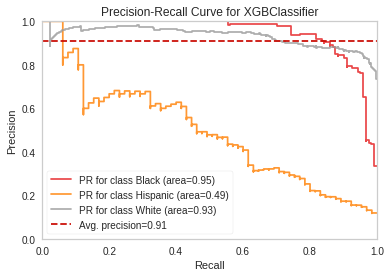

In [ ]:
model = XGBClassifier(random_state=seed, colsample_bytree=0.5, subsample=1)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

#Comparing Models

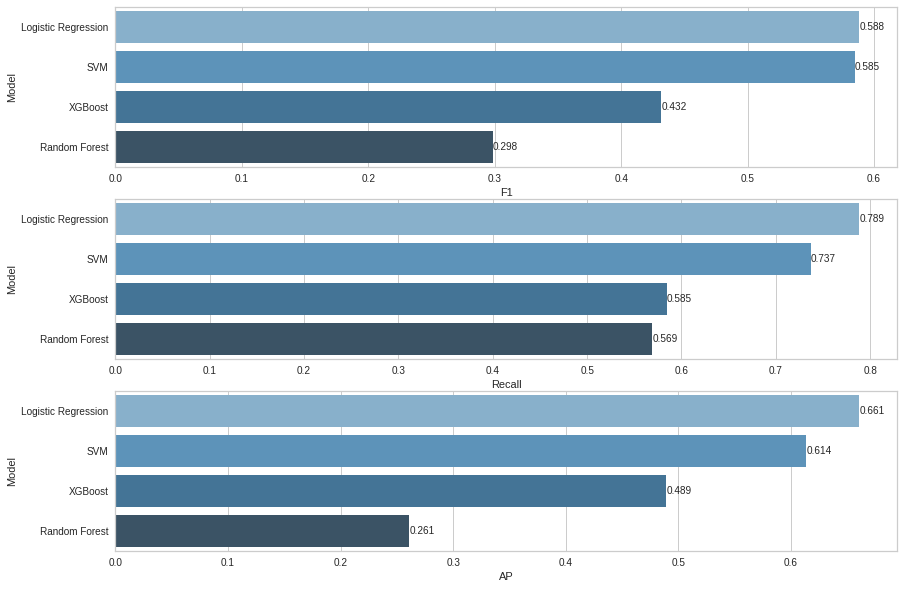

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

##Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
final_model = Pipeline(steps=operations)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=5))])

In [ ]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBi

In [ ]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                  245.413
acromialheight                                 1405.963
acromionradialelength                           327.443
anklecircumference                              224.589
axillaheight                                   1299.623
balloffootcircumference                         243.879
balloffootlength                                194.725
biacromialbreadth                               398.932
bicepscircumferenceflexed                       339.945
bicristalbreadth                                274.124
bideltoidbreadth                                489.757
bimalleolarbreadth                               72.185
bitragionchinarc                                324.433
bitragionsubmandibulararc                       306.055
bizygomaticbreadth                              139.315
buttockcircumference                           1017.874
buttockdepth                                    240.809
buttockheight                                   

In [ ]:
final_model.predict(X.loc[[201]])

array(['Black'], dtype=object)

In [ ]:
y[201]

'Black'

In [ ]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7666911111671727

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7567003704291901

Evaluation metrics https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

White       2556
Hispanic    1200
Black        844
Name: DODRace, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

White       2500
Black        844
Hispanic     453
Name: DODRace, dtype: int64

In [ ]:
from imblearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = Pipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black        844
Name: DODRace, dtype: int64

In [ ]:
y_train.value_counts()

White       2556
Black        844
Hispanic     453
Name: DODRace, dtype: int64

Logistic Regression Over/Under Sampling

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=seed, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=5, solver='saga')

In [ ]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[330  25   7]
 [  7 150  37]
 [ 41 136 919]]
              precision    recall  f1-score   support

       Black       0.87      0.91      0.89       362
    Hispanic       0.48      0.77      0.59       194
       White       0.95      0.84      0.89      1096

    accuracy                           0.85      1652
   macro avg       0.77      0.84      0.79      1652
weighted avg       0.88      0.85      0.86      1652


Train_Set
[[ 795   28   21]
 [  16  384   53]
 [  60  282 2214]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       844
    Hispanic       0.55      0.85      0.67       453
       White       0.97      0.87      0.91      2556

    accuracy                           0.88      3853
   macro avg       0.81      0.89      0.84      3853
weighted avg       0.91      0.88      0.89      3853



In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [ ]:
print(shap_values[0].shape)

(1, 226)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test[start_index:end_index])[0]
print(f"The model_shap predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The model_shap predicted: Black


In [ ]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [ ]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

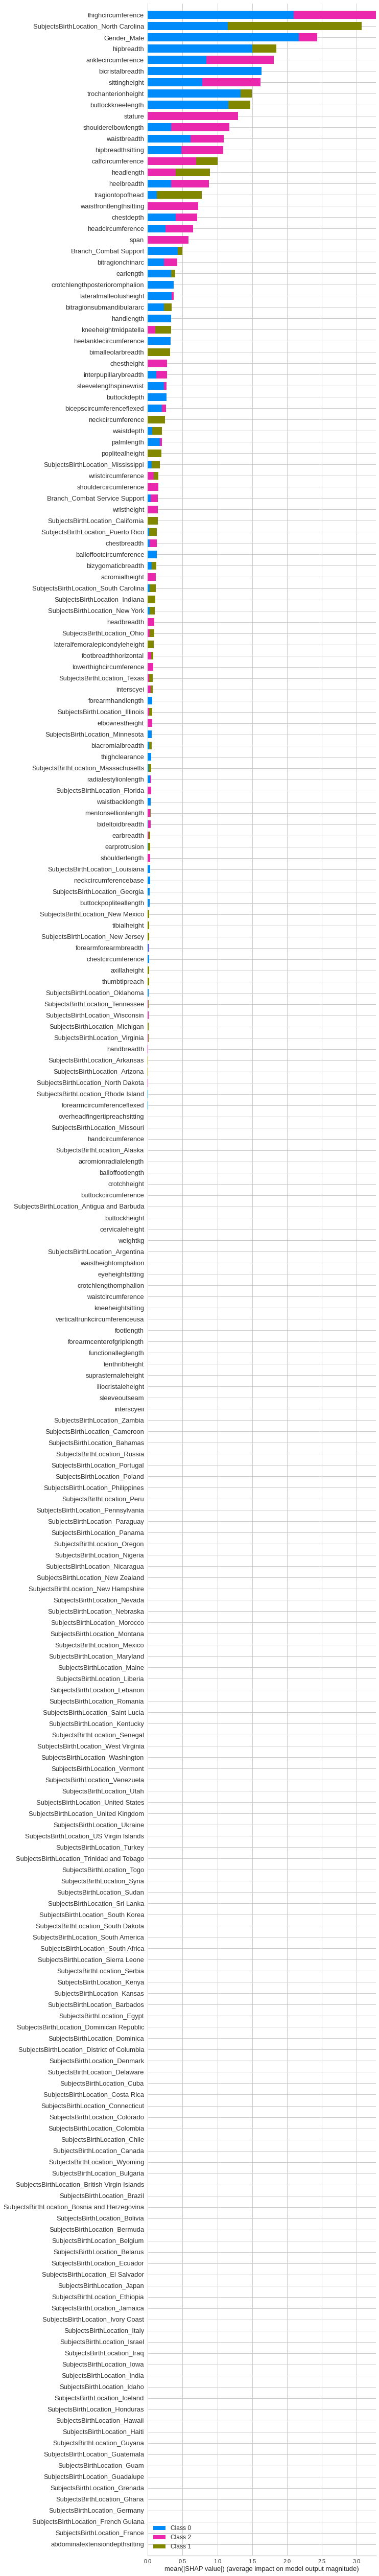

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

Shap values for all data

In [ ]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

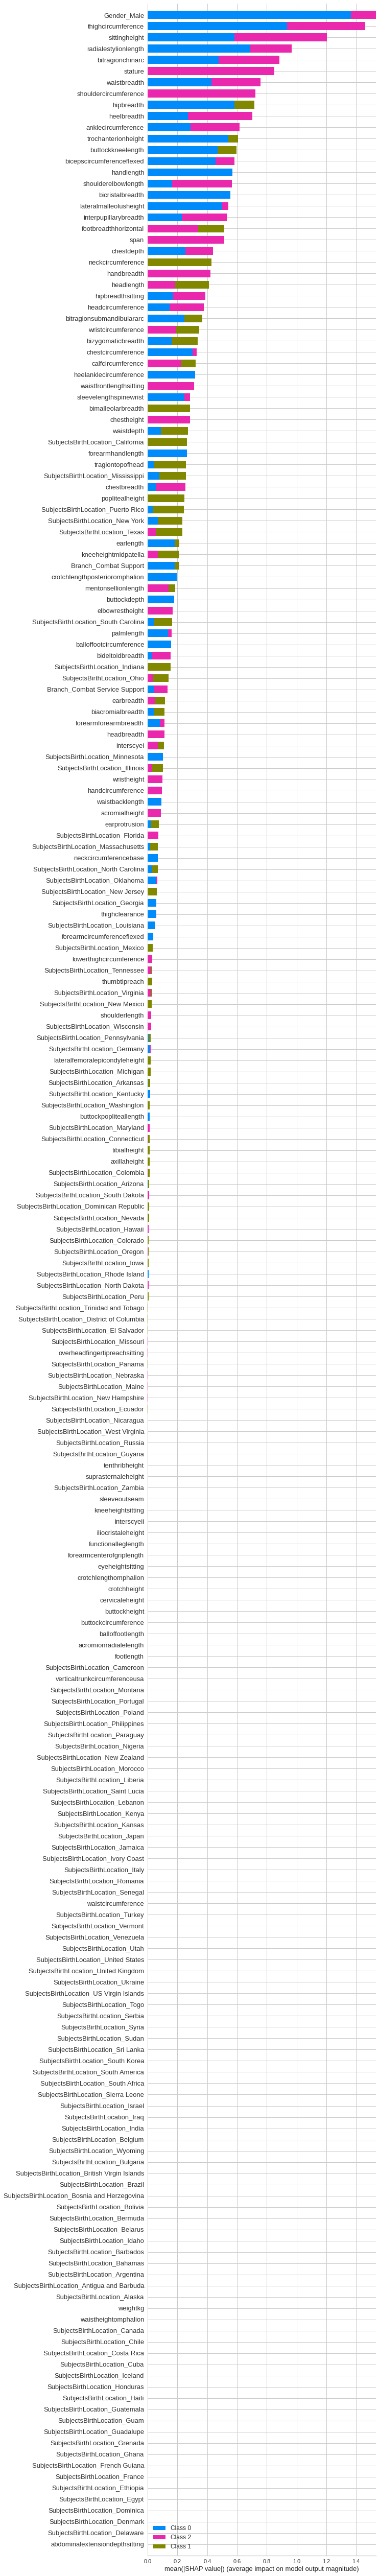

In [ ]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

##Find the best threshold for multiclassification

In [ ]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength",
            'bitragionsubmandibulararc','footbreadthhorizontal',  'bimalleolarbreadth', 
            'poplitealheight', 'waistdepth',  'tragiontopofhead','wristcircumference',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight',
            'buttockkneelength', 'earlength', 'earbreadth','kneeheightmidpatella','bizygomaticbreadth',
            'axillaheight']

In [ ]:
X3 = df[hispanic]
X3 = pd.get_dummies(X3, drop_first=True)
y = df.DODRace

In [ ]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=seed, stratify =y2)

<IPython.core.display.Javascript object>

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
pipe_shap_model2 = Pipeline(steps=operations)

In [ ]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=5))])

In [ ]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[798 174]
 [ 22 107]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.38      0.83      0.52       129

    accuracy                           0.82      1101
   macro avg       0.68      0.83      0.71      1101
weighted avg       0.90      0.82      0.85      1101


Train_Set
[[3182  704]
 [  82  436]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3886
           1       0.38      0.84      0.53       518

    accuracy                           0.82      4404
   macro avg       0.68      0.83      0.71      4404
weighted avg       0.91      0.82      0.85      4404



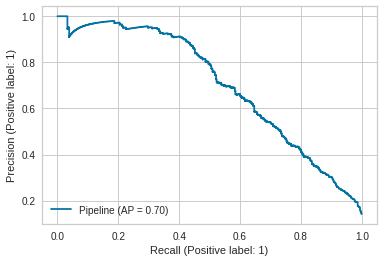

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=seed))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [ ]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.7033116809349387

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.27308511727145923

In [ ]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [ ]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[627 345]
 [ 10 119]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       972
           1       0.26      0.92      0.40       129

    accuracy                           0.68      1101
   macro avg       0.62      0.78      0.59      1101
weighted avg       0.90      0.68      0.74      1101



In [ ]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2495 1391]
 [  26  492]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      3886
           1       0.26      0.95      0.41       518

    accuracy                           0.68      4404
   macro avg       0.63      0.80      0.59      4404
weighted avg       0.90      0.68      0.74      4404



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=seed))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      66.69%  std 1.74%
Precision-1   24.91%  std 1.01%
Recall-1      90.72%  std 3.02%
F1_score-1    39.08%  std 1.35%
